In [18]:
from datetime import datetime

date_completion = datetime.today().strftime("%Y-%m-%d")
print(f"Module 7 completed by Edgar Flores on {date_completion}")

Module 7 completed by Edgar Flores on 2024-08-19


# Module 7 : Project Case Scenario

Dataset Variables

The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

Task 1: Import Dataset and Understand Data

In [9]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Import data
data_url = "http://lib.stat.cmu.edu/datasets/boston"  # Not the URL from coursera did not work, found the dataset online, please fix this in future
df_boston = pd.read_csv("boston_housing.csv")
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


Task 2: Generate Descriptive Statistics and Visualizations

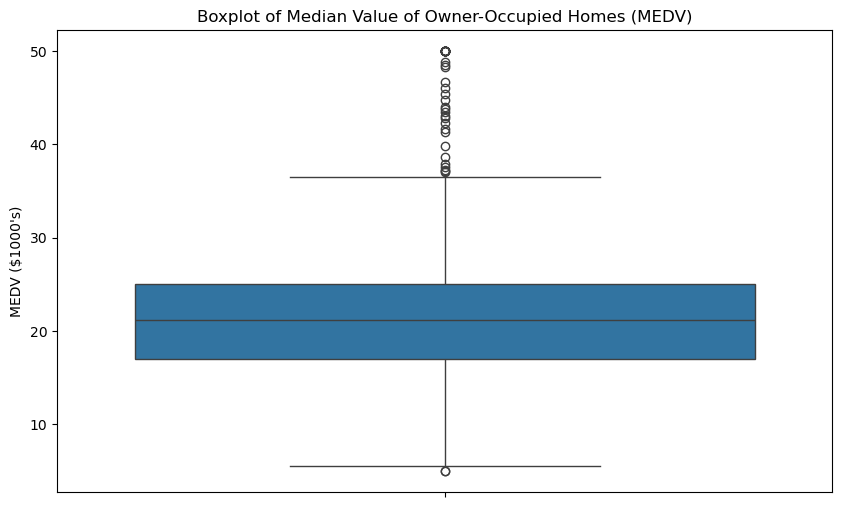

In [11]:
# 1) For the "Median value of owner-occupied homes" provide a boxplot

plt.figure(figsize=(10, 6))
sns.boxplot(y=df_boston["MEDV"])
plt.title("Boxplot of Median Value of Owner-Occupied Homes (MEDV)")
plt.ylabel("MEDV ($1000's)")
plt.show()

Findings Fig 1: 

The boxplot of the Median Value of Owner-Occupied Homes provides insights into the distribution of home values in the dataset:  
   
1. Median Value: The median value of owner-occupied homes is approximately $21,000 (in $1000's), as indicated by the line inside the box.  
   
2. Interquartile Range (IQR): The IQR, which represents the middle 50% of the data, ranges from about $17,000 to $25,000. This suggests that the majority of home values fall within this range.  
   
3. Whiskers: The lower whisker extends to around $10,000, and the upper whisker extends to about $37,000. These whiskers represent the range within which the bulk of the data lies, excluding outliers.   
   
4. Skewness and Outliers: There are several outliers above the upper whisker, with values reaching up to $50,000. There is also one outlier below the lower whisker, indicating a home with a median value significantly lower than the rest. The boxplot shows a slight positive skew, as the upper whisker is longer than the lower whisker and there are more outliers on the higher end. This suggests that while most home values are clustered around the median, there are a few homes with much higher values.  
   
Overall, the boxplot indicates that the median home values in the dataset are generally clustered between $17,000 and $25,000, with a few homes having significantly higher values.

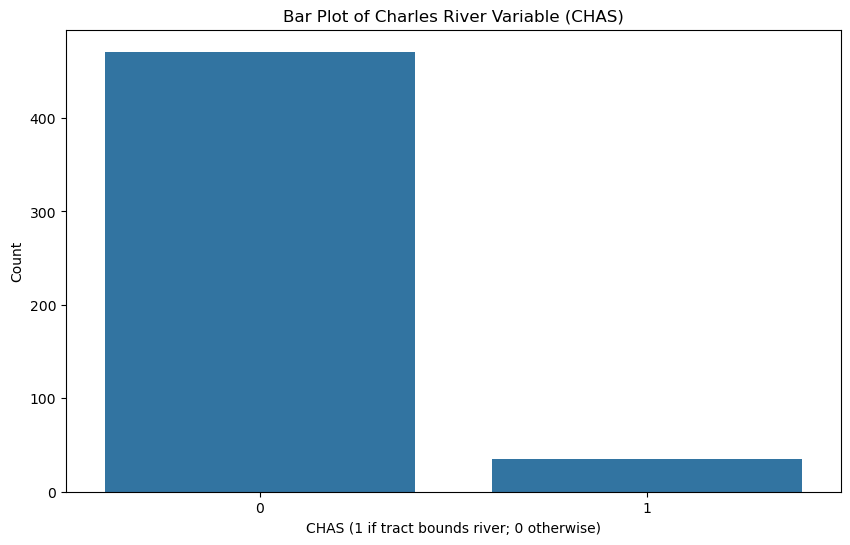

In [12]:
# 2) Provide a  bar plot for the Charles river variable

plt.figure(figsize=(10, 6))
sns.countplot(x=df_boston["CHAS"])
plt.title("Bar Plot of Charles River Variable (CHAS)")
plt.xlabel("CHAS (1 if tract bounds river; 0 otherwise)")
plt.ylabel("Count")
plt.show()

Findings Fig 2:

The bar plot of the Charles River variable provides insights into the distribution of tracts that bound the Charles River versus those that do not:  
   
1. Distribution:  
   - The vast majority of tracts do not bound the Charles River, as indicated by the high count for CHAS = 0.  
   - Only a small number of tracts bound the Charles River, as indicated by the much lower count for CHAS = 1.  
   
2. Counts:  
   - The count for CHAS = 0 is approximately 470, suggesting that most of the tracts in the dataset do not have a boundary along the Charles River.  
   - The count for CHAS = 1 is significantly lower, around 35, indicating that only a small fraction of the tracts are adjacent to the Charles River.  
   
3. Proportion:  
   - The proportion of tracts that bound the Charles River is relatively small compared to those that do not suggesting that being adjacent to the Charles River is a less common characteristic among the tracts in the dataset.  
   
Summary:  
The bar plot reveals that the majority of the tracts in the dataset do not bound the Charles River, with only a small fraction having a boundary along the river. This indicates that proximity to the Charles River is a relatively rare feature among the tracts.

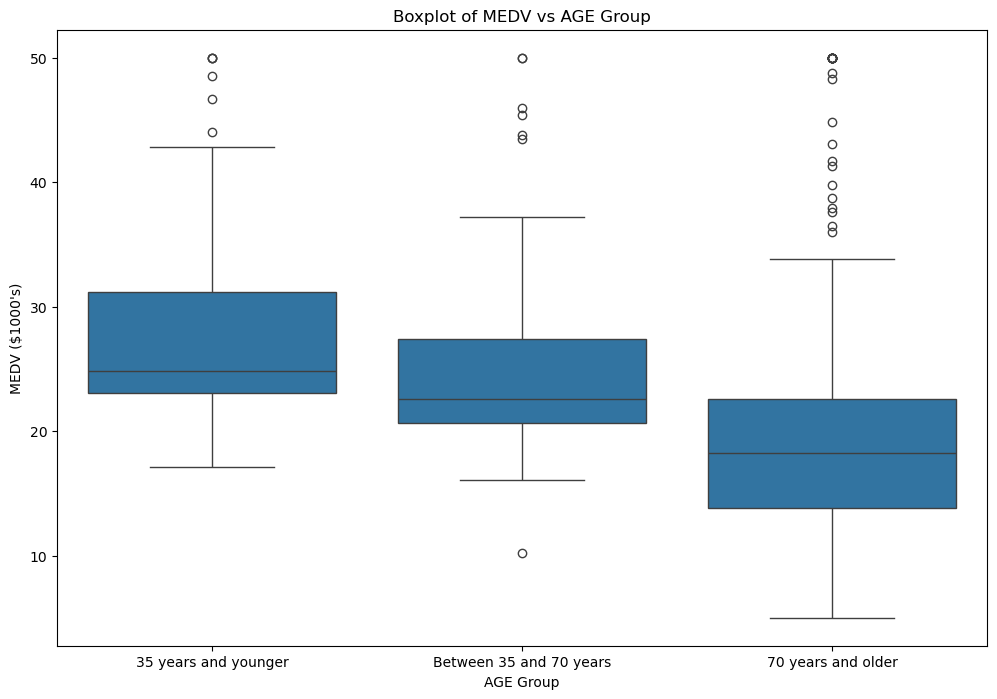

In [13]:
# 3) Provide a boxplot for the MEDV variable vs the AGE variable.
# (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

# Discretize the AGE variable
bins = [0, 35, 70, 100]
labels = ["35 years and younger", "Between 35 and 70 years", "70 years and older"]
df_boston["AGE_group"] = pd.cut(df_boston["AGE"], bins=bins, labels=labels)

plt.figure(figsize=(12, 8))
sns.boxplot(x="AGE_group", y="MEDV", data=df_boston)
plt.title("Boxplot of MEDV vs AGE Group")
plt.xlabel("AGE Group")
plt.ylabel("MEDV ($1000's)")
plt.show()

Findings Fig 3:

The boxplot of MEDV (Median Value of Owner-Occupied Homes) versus AGE Group provides insights into how the median home values vary across different age groups of homes:  
   
1. 35 Years and Younger:  
   - Median Value: The median value for homes in this age group is around $30,000.  
   - Interquartile Range (IQR): The IQR ranges from approximately $23,000 to $35,000.  
   - Whiskers: The lower whisker extends to about $17,000, and the upper whisker extends to around $40,000.  
   - Outliers: There are a few outliers above $40,000, indicating some homes have significantly higher values.  
   
2. Between 35 and 70 Years:  
   - Median Value: The median value for homes in this age group is around $22,000.  
   - Interquartile Range (IQR): The IQR ranges from approximately $18,000 to $25,000.  
   - Whiskers: The lower whisker extends to about $12,000, and the upper whisker extends to around $35,000.  
   - Outliers: There are several outliers above $35,000, indicating some homes have significantly higher values.  
   
3. 70 Years and Older:  
   - Median Value: The median value for homes in this age group is around $20,000.  
   - Interquartile Range (IQR): The IQR ranges from approximately $17,000 to $23,000.  
   - Whiskers: The lower whisker extends to about $10,000, and the upper whisker extends to around $30,000.  
   - Outliers: There are several outliers above $30,000, indicating some homes have significantly higher values.  
   
Summary:  
- Younger Homes (35 years and younger) tend to have higher median values compared to older homes. 
- Middle-aged Homes (Between 35 and 70 years) have a median value of around $22,000.
- Older Homes (70 years and older) have the lowest median value at around $20,000. 
   
Overall, the boxplot indicates that newer homes tend to have higher median values, while older homes have lower median values. 

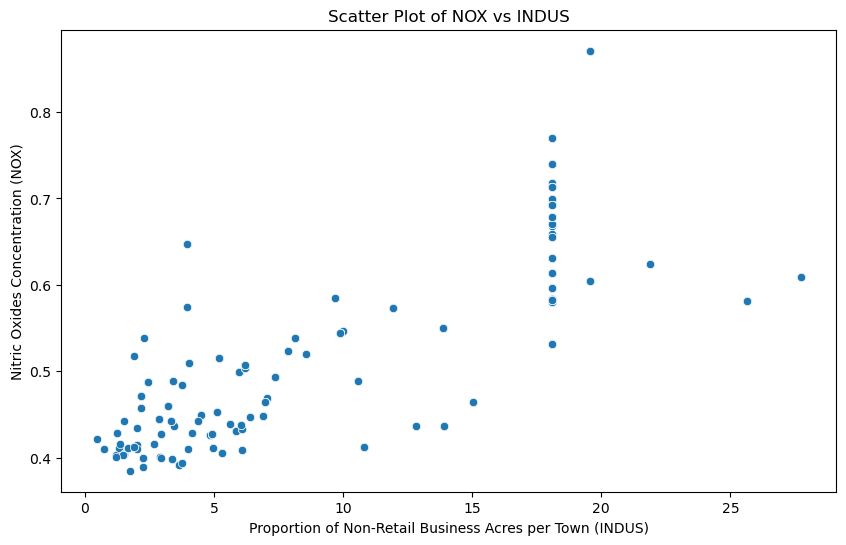

In [14]:
# 4) Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

plt.figure(figsize=(10, 6))
sns.scatterplot(x="INDUS", y="NOX", data=df_boston)
plt.title("Scatter Plot of NOX vs INDUS")
plt.xlabel("Proportion of Non-Retail Business Acres per Town (INDUS)")
plt.ylabel("Nitric Oxides Concentration (NOX)")
plt.show()

Findgins Fig. 4:

   
1. Positive Correlation:  
   - There is a general positive correlation between NOX and INDUS. As the proportion of non-retail business acres increases, the concentration of nitric oxides tends to increase as well.  
   - Moreover, the relationship between NOX and INDUS is not perfectly linear. While there is a general trend of increasing NOX with increasing INDUS, the scatter plot shows dispersion, especially at higher INDUS values.  

2. Outliers:  
   - There are a few outliers with very high NOX concentrations (above 0.8) and varying INDUS values. These outliers indicate that some towns have exceptionally high levels of nitric oxide pollution, regardless of their industrial activity proportion.  
   
   
Summary:  
The scatter plot indicates a positive correlation between the proportion of non-retail business acres per town (INDUS) and nitric oxides concentration (NOX). Towns with higher industrial activity tend to have higher levels of nitric oxide pollution. .

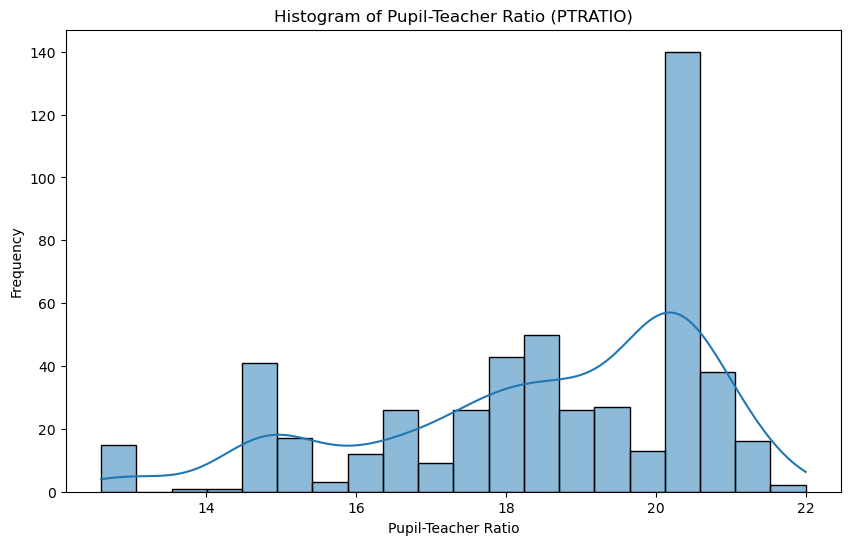

In [15]:
# 5) Create a histogram for the pupil to teacher ratio variable

plt.figure(figsize=(10, 6))
sns.histplot(df_boston["PTRATIO"], bins=20, kde=True)
plt.title("Histogram of Pupil-Teacher Ratio (PTRATIO)")
plt.xlabel("Pupil-Teacher Ratio")
plt.ylabel("Frequency")
plt.show()

Findings Fig. 5: 

   
1. Distribution Shape:  
   - The distribution of PTRATIO is right-skewed, with a peak around the higher end of the ratio range.  
   
2. Modes:  
   - There is a prominent mode (peak) at a PTRATIO of around 20, indicating that many towns have a pupil-teacher ratio close to this value.  
   
3. Range:  
   - The PTRATIO values range from about 12 to 22, indicating variability in the pupil-teacher ratios across different towns.  
   - The majority of the data falls between PTRATIO values of 14 and 21.  
   
Summary:  
The histogram indicates that the pupil-teacher ratio in the dataset is right-skewed, with a prominent peak around a ratio of 20. This suggests that many towns have a pupil-teacher ratio close to 20. 

TASK 3: Use the appropriate tests to answer the questions provided

For each of the following questions;

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

State your hypothesis.

Use α = 0.05

Perform the test Statistics.

State the conclusion from the test.


In [16]:
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf


# T-test for Independent Samples
chas_0 = df_boston[df_boston["CHAS"] == 0]["MEDV"]
chas_1 = df_boston[df_boston["CHAS"] == 1]["MEDV"]
t_stat, p_value = stats.ttest_ind(chas_0, chas_1)
print(f"T-test p-value: {p_value}")

# ANOVA
anova_result = smf.ols("MEDV ~ C(AGE)", data=df_boston).fit()
anova_table = sm.stats.anova_lm(anova_result, typ=2)
print(anova_table)

# Pearson Correlation
corr, p_value = stats.pearsonr(df_boston["NOX"], df_boston["INDUS"])
print(f"Pearson correlation p-value: {p_value}")

# Regression Analysis
regression_result = smf.ols("MEDV ~ DIS", data=df_boston).fit()
print(regression_result.summary())

T-test p-value: 7.390623170519905e-05
                sum_sq     df         F   PR(>F)
C(AGE)    29884.038419  355.0  0.984009  0.55397
Residual  12832.256996  150.0       NaN      NaN
Pearson correlation p-value: 7.913361061241167e-98
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 19 Aug 2024   Prob (F-statistic):           1.21e-08
Time:                        10:12:13   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                

# Answers to Task 3: 
   
1. Is there a significant difference in the median value of houses bounded by the Charles River or not?  
   
T-test Results:  
- p-value: 7.390623170519905e-05  
   
Since the p-value (7.39e-05) is much less than the significance level α = 0.05 there is a significant difference in the median value of houses bounded by the Charles River compared to those not bounded by the Charles River.  
   
2. Is there a difference in Median values of houses (MEDV) for each proportion of owner-occupied units built prior to 1940 (AGE)?  
   
ANOVA Results:  
- p-value: 0.55397  
   
Since the p-value (0.55397) is greater than the significance level α = 0.05, there is no significant difference in the median values of houses for different proportions of owner-occupied units built prior to 1940.  
   
3. Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?  
   
Pearson Correlation Results:  
- p-value: 7.913361061241167e-98  
   
 Since the p-value (7.91e-98) is much less than the significance level α = 0.05, there is a significant relationship between nitric oxide concentrations and the proportion of non-retail business acres per town.  
   
4. What is the impact of an additional weighted distance to the five Boston employment centers on the median value of owner-occupied homes?  
   
Regression Analysis Results:  
- Coefficient for DIS: 1.0916  
- p-value for DIS: 0.000  
   
Since the p-value for DIS (0.000) is much less than the significance level α = 0.05, the weighted distance to the five Boston employment centers (DIS) has a significant impact on the median value of owner-occupied homes. Moreover, the median value of owner-occupied homes increases by approximately 1.09 units.  
